In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn.preprocessing
import sklearn.cluster
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
# Read data
data=pd.read_csv('dengue.csv')
print(data.shape)
'''
To check nan rows
df1 = data[data.isnull().any(axis=1)]
print(df1)
'''
data=data.dropna()
print(data.shape)

predictors=list(['humid', 'temp' , 'h10pix', 'trees' , 'Xmin', 'Ymin'])

# Normalice data
data[predictors]=(data[predictors]-data[predictors].mean())/data[predictors].std()
print(data[predictors].mean())
print(data[predictors].std())

(2000, 14)
(1986, 14)
humid    -1.553781e-15
temp     -6.259417e-17
h10pix    1.271781e-16
trees     9.302171e-17
Xmin     -3.904547e-17
Ymin      9.413976e-17
dtype: float64
humid     1.0
temp      1.0
h10pix    1.0
trees     1.0
Xmin      1.0
Ymin      1.0
dtype: float64


In [3]:
n_obs = data.shape[0]  # Number of observations

'''
# Set equal importance to every feature with sklearn
mms = sklearn.preprocessing.MinMaxScaler().fit(data)
scal_data = mms.transform(data)
print(scal_data)
'''

'\n# Set equal importance to every feature with sklearn\nmms = sklearn.preprocessing.MinMaxScaler().fit(data)\nscal_data = mms.transform(data)\nprint(scal_data)\n'

In [4]:
max_n=20
n_clusters=np.arange(2,max_n)
sum_squared_dist=np.zeros(len(n_clusters))
print(n_clusters)
for i in range(len(n_clusters)):
    kmeans = sklearn.cluster.KMeans(n_clusters=n_clusters[i]).fit(data[predictors])
    sum_squared_dist[i]=kmeans.inertia_

[ 2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]


Text(0, 0.5, 'Sum of squared distances')

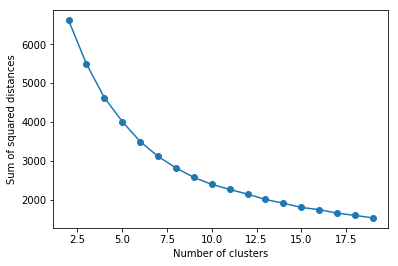

In [5]:
plt.plot(n_clusters,sum_squared_dist,marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Sum of squared distances')

Como se espera, a medida que aumenta el número de grupos disminuye la suma de distancias cuadráticas. Esto se debe a que a medida que aumenta el número de grupos, los grupos creados son cada vez más pequeños y más cercanos a cada una de las observaciones. Así, para un número de grupos igual al número de observaciones se espera una suma de distancias cuadráticas igual a cero, ya que cada grupo estaría conformado por una sola observación. El mejor valor para K se puede obtener de la gráfica anterior, ya que este valor corresponde al número de grupos para el que se observa una forma de codo. Con base en esto, el mejor valor para el número de grupos (cluster numbers) es cercano a 10

In [6]:
# Con train  y test y con criterior bayesiano

# Divide en train y test. Train se va a utilizar como cross validation
train_data, test_data = sklearn.model_selection.train_test_split(data, train_size=0.5)

/srv/conda/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2069: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [7]:
from scipy.spatial import distance

# Criterio Bayesiano
def bic(kmeans,X):
    # assign centers and labels
    centers = [kmeans.cluster_centers_]
    labels  = kmeans.labels_
    #number of clusters
    m = kmeans.n_clusters
    # size of the clusters
    n = np.bincount(labels)
    #size of data set
    N, d = X.shape

    #variance
    cl_var = (1.0 / (N - m) / d) * sum([sum(distance.cdist(X[np.where(labels == i)], [centers[0][i]], 'euclidean')**2) for i in range(m)])


    const_term = 0.5 * m * np.log(N) * (d+1)

    BIC = np.sum([n[i] * np.log(n[i]) -
               n[i] * np.log(N) -
             ((n[i] * d) / 2) * np.log(2*np.pi*cl_var) -
             ((n[i] - 1) * d/ 2) for i in range(m)]) - const_term

    return(BIC)




ks = range(1,20)

# run w0 times kmeans and save each result in the KMeans object
KMeans = [sklearn.cluster.KMeans(n_clusters=i).fit(data[predictors]) for i in ks]

# now run for each cluster the BIC computation
BIC = [bic(kmeansi,np.array(data[predictors])) for kmeansi in KMeans]

plt.plot(ks,np.abs(BIC),'r-o')
plt.xlabel("# clusters")
plt.ylabel("# BIC")

NameError: name 'distance' is not defined

# Parte 2

## Patrones considerando cuatro variables, incluyendo 'Item' como variable numérica a través de un diccionario

In [59]:
data = pd.read_csv('BreadBasket_DMS.csv')
predictors=list(data.keys())

print(predictors)
#print(data)

data_modif=data.copy()


# date to number
data_modif['Date'] = data_modif['Date'].str.replace("-","").astype(int)


# Time to seconds
data_modif['Time'] = data_modif['Time'].str.split(':').apply(lambda x: (int(x[0]) * 3600) + (int(x[1])*60) + int(x[2]))

print(data_modif)
# # Normalice data
# data[predictors]=(data[predictors]-data[predictors].mean())/data[predictors].std()
# print(data[predictors].mean())
# print(data[predictors].std())

['Date', 'Time', 'Transaction', 'Item']
           Date   Time  Transaction                  Item
0      20161030  35891            1                 Bread
1      20161030  36334            2          Scandinavian
2      20161030  36334            2          Scandinavian
3      20161030  36477            3         Hot chocolate
4      20161030  36477            3                   Jam
5      20161030  36477            3               Cookies
6      20161030  36521            4                Muffin
7      20161030  36783            5                Coffee
8      20161030  36783            5                Pastry
9      20161030  36783            5                 Bread
10     20161030  37015            6             Medialuna
11     20161030  37015            6                Pastry
12     20161030  37015            6                Muffin
13     20161030  37152            7             Medialuna
14     20161030  37152            7                Pastry
15     20161030  37152          

In [60]:
# Replace 'items' by numbers with dictionary item_nums
labels = data['Item'].astype('category').cat.categories.tolist()
item_nums = {k: v for k,v in zip(labels,list(range(1,len(labels)+1)))}

data_modif.replace(item_nums, inplace=True)
print(data_modif)

           Date   Time  Transaction  Item
0      20161030  35891            1    12
1      20161030  36334            2    76
2      20161030  36334            2    76
3      20161030  36477            3    49
4      20161030  36477            3    50
5      20161030  36477            3    27
6      20161030  36521            4    61
7      20161030  36783            5    24
8      20161030  36783            5    67
9      20161030  36783            5    12
10     20161030  37015            6    56
11     20161030  37015            6    67
12     20161030  37015            6    61
13     20161030  37152            7    56
14     20161030  37152            7    67
15     20161030  37152            7    24
16     20161030  37152            7    85
17     20161030  37251            8    67
18     20161030  37251            8    12
19     20161030  37319            9    12
20     20161030  37319            9    61
21     20161030  37558           10    76
22     20161030  37558           1

In [37]:
from sklearn.decomposition import PCA

# Normalice
data_modif[predictors]=(data_modif[predictors]-data_modif[predictors].mean())/data_modif[predictors].std()
print(data_modif[predictors].mean())

# x_std = StandardScaler().fit_transform(data)
x_std=data_modif[predictors]
pca = PCA(n_components=len(predictors))
pca.fit(x_std)
x_r=pca.transform(x_std)

x_r=pca.transform(x_std)
loads=pca.components_
#print(loads)

Date          -9.951494e-17
Time           5.000983e-16
Transaction   -1.480993e-16
Item          -9.428214e-16
dtype: float64


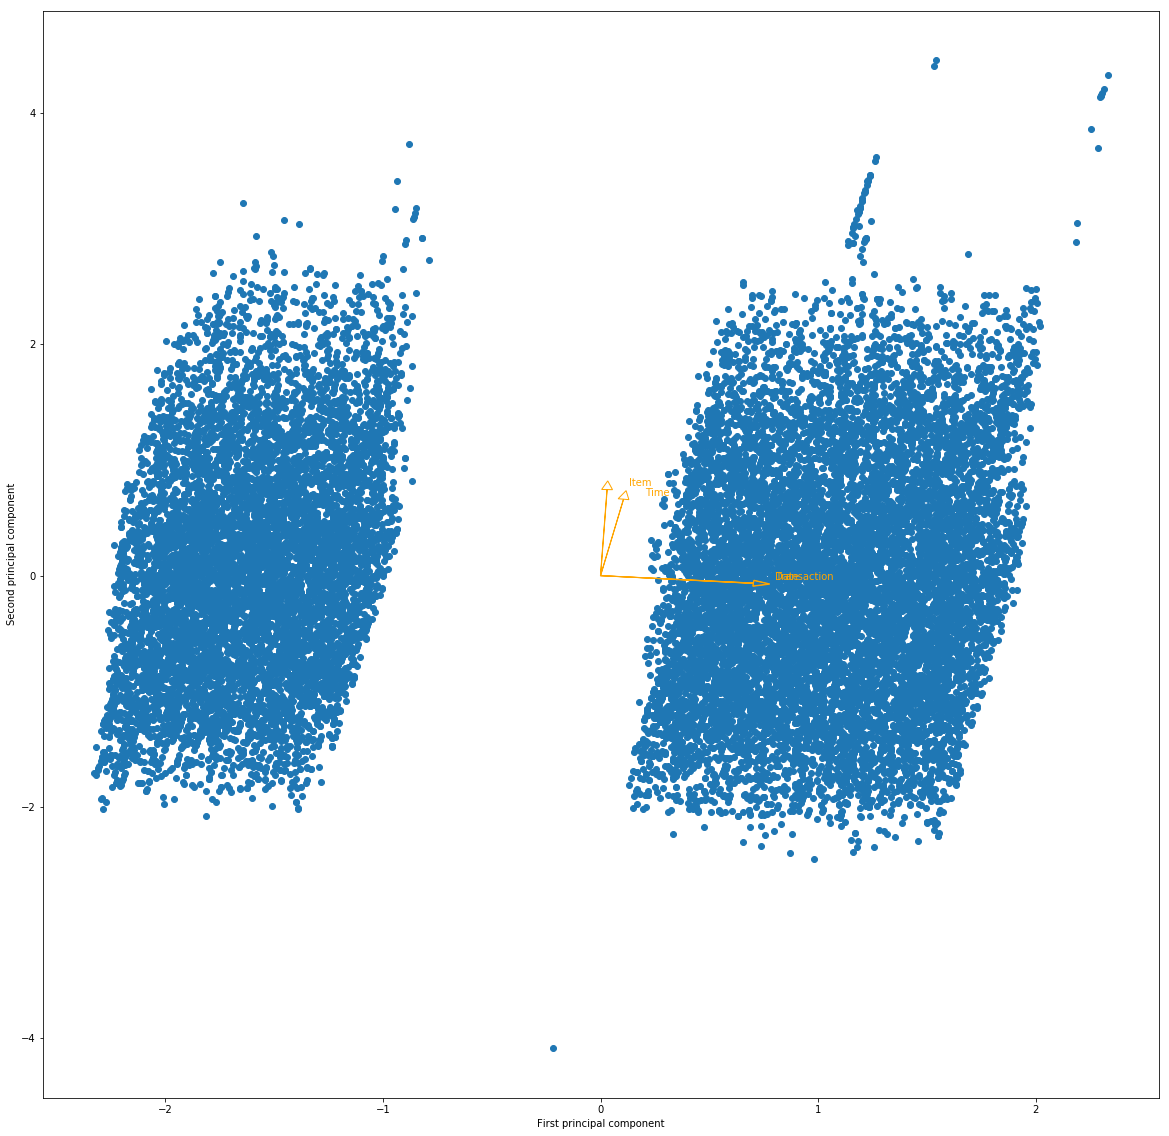

In [38]:
# Plot proyected data
plt.figure(figsize=(20,20))
plt.scatter(x_r[:,0],x_r[:,1])
plt.xlabel('First principal component')
plt.ylabel('Second principal component')

# # Plot text labels
# names_head='Item'
# names=data[names_head].ravel()
# for i in range(x_r.shape[0]):
#     plt.text(x_r[i,0],x_r[i,1],names[i]) 

# Plot load vectors
for i in range(loads.shape[1]):
    
    plt.arrow(0,0,loads[0,i],loads[1,i],ec='orange',fc='none',head_width=0.05)
    plt.text(loads[0,i]+0.1,loads[1,i]+0.1,predictors[i],color='orange', verticalalignment='top', horizontalalignment='left') 

[[ 7.02714813e-01  1.05674028e-01  7.02934666e-01  3.01288231e-02]
 [-6.72835520e-02  6.61206111e-01 -6.40457745e-02  7.44431018e-01]
 [-4.26785438e-02  7.42719357e-01 -4.04003475e-02 -6.67018973e-01]
 [ 7.06996009e-01  2.72670742e-03 -7.07211995e-01  6.34507623e-04]]


(-1.1, 1.1)

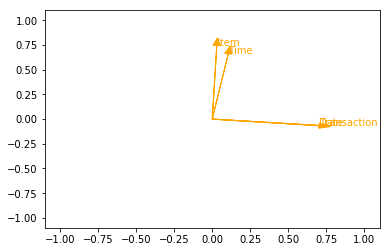

In [39]:
print(loads)
# Plot load vectors
for i in range(loads.shape[1]):
    #plt.plot([0,loads[0,i]],[0,loads[1,i]],label=predictors[i])
    plt.arrow(0,0,loads[0,i],loads[1,i],linewidth=1,color='orange',head_width=0.05)
    
#plt.legend()
    plt.text(loads[0,i],loads[1,i],predictors[i],color='orange') 
plt.xlim([-1.1, 1.1])
plt.ylim([-1.1, 1.1])

Tendencias: Se observan dos conjuntos de numerosos datos. Estos dos conjuntos difieren considerablemente en el valor de la primera componente principal y, por lo tanto, se espera que los vectores de pesos que varíen considerablemente en esta dirección indiquen tendencias. Por ejemplo, altos valores de la primera componente principal indican productos con transacciones y fechas de transacción altas Un alto valor en la segunda componente principal indica altos tiempos de transacción y tienden a ser productos de la última lista del diccionario creado de items

[0.46890136 0.25878958 0.23860543 0.03370363]
[0.46890136 0.72769094 0.96629637 1.        ]


(0, 1.1)

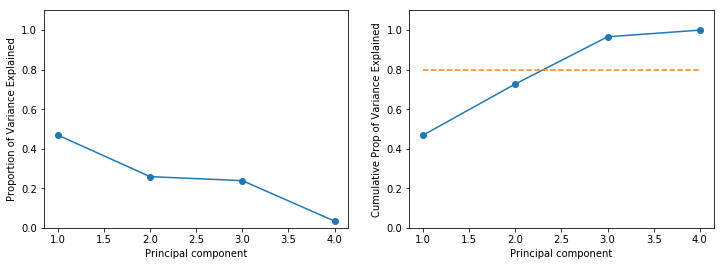

In [40]:
exp_var=pca.explained_variance_ratio_
cum_exp_var=np.cumsum(exp_var)
print(exp_var)
print(cum_exp_var)
pc=np.arange(1,len(predictors)+1)  # principal components

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(12,4))
ax = axs[0]
ax.plot(pc,exp_var,marker='o')
ax.set_xlabel('Principal component')
ax.set_ylabel('Proportion of Variance Explained')
ax.set_ylim(0,1.1)

ax = axs[1]
ax.plot(pc,cum_exp_var,marker='o')
ax.plot([min(pc),max(pc)],[0.8,0.8], '--')
ax.set_xlabel('Principal component')
ax.set_ylabel('Cumulative Prop of Variance Explained')
ax.set_ylim(0,1.1)

Con las primeras dos componentes se ha explicado el 72 % de la varianza y con las tres primeras componentes se obtiene el 96 %.

[ 2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20]


Text(0, 0.5, 'Sum of squared distances')

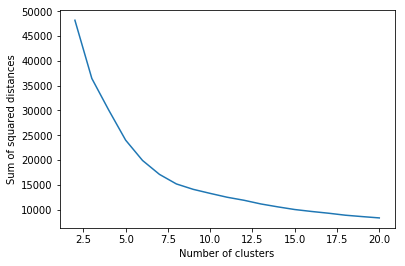

In [44]:
# Clustering. First the best number of clusters is determined

n_obs = data.shape[0]  # Number of observations

# # Set equal importance to every feature with sklearn
# mms = MinMaxScaler()
# mms.fit(data)
# scal_data = mms.transform(data[predictors])

n_clusters=np.arange(2,round(n_obs*1e-3))
sum_squared_dist=np.zeros(len(n_clusters))
print(n_clusters)
for i in range(len(n_clusters)):
    kmeans = sklearn.cluster.KMeans(n_clusters=n_clusters[i]).fit(data_modif[predictors])
    sum_squared_dist[i]=kmeans.inertia_

Text(0, 0.5, 'Sum of squared distances')

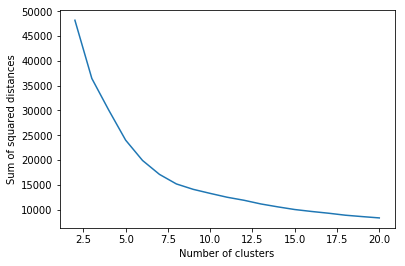

In [45]:
plt.plot(n_clusters,sum_squared_dist)
plt.xlabel('Number of clusters')
plt.ylabel('Sum of squared distances')

El número de grupos apropiado es aproximadamente 8

Text(0.5, 0, 'Transaction')

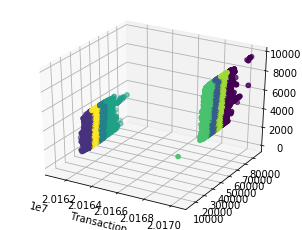

In [66]:
from mpl_toolkits.mplot3d import Axes3D
y_pred = sklearn.cluster.KMeans(n_clusters=8).fit_predict(data_modif[predictors])
fig = plt.figure(1, figsize=(4, 3))
ax = Axes3D(fig)
ax.scatter(data_modif['Date'], data_modif['Time'], data_modif['Transaction'],
               c=y_pred)
ax.set_xlabel('Date')
ax.set_ylabel('Time')
ax.set_zlabel('Transaction')

# Patrones sin considerar 'Item' como una variable

In [73]:
data = pd.read_csv('BreadBasket_DMS.csv')
predictors=list(data.keys())
predictors.remove('Item')

print(predictors)
#print(data)

data_modif=data.copy()


# date to number
data_modif['Date'] = (pd.DatetimeIndex(data['Date']).year*365)+((pd.DatetimeIndex(data['Date']).month-1)*30)+ pd.DatetimeIndex(data['Date']).day


# Time to seconds
data_modif['Time'] = data_modif['Time'].str.split(':').apply(lambda x: (int(x[0]) * 3600) + (int(x[1])*60) + int(x[2]))

print(data_modif)
# # Normalice data
# data[predictors]=(data[predictors]-data[predictors].mean())/data[predictors].std()
# print(data[predictors].mean())
# print(data[predictors].std())

['Date', 'Time', 'Transaction']
         Date   Time  Transaction                  Item
0      736140  35891            1                 Bread
1      736140  36334            2          Scandinavian
2      736140  36334            2          Scandinavian
3      736140  36477            3         Hot chocolate
4      736140  36477            3                   Jam
5      736140  36477            3               Cookies
6      736140  36521            4                Muffin
7      736140  36783            5                Coffee
8      736140  36783            5                Pastry
9      736140  36783            5                 Bread
10     736140  37015            6             Medialuna
11     736140  37015            6                Pastry
12     736140  37015            6                Muffin
13     736140  37152            7             Medialuna
14     736140  37152            7                Pastry
15     736140  37152            7                Coffee
16     736140  3

In [74]:
from sklearn.decomposition import PCA

# Normalice
data_modif[predictors]=(data_modif[predictors]-data_modif[predictors].mean())/data_modif[predictors].std()
print(data_modif[predictors].mean())

# x_std = StandardScaler().fit_transform(data)
x_std=data_modif[predictors]
pca = PCA(n_components=len(predictors))
pca.fit(x_std)
x_r=pca.transform(x_std)

x_r=pca.transform(x_std)
loads=pca.components_
#print(loads)

Date           9.776065e-13
Time           2.005315e-17
Transaction   -3.119657e-16
dtype: float64


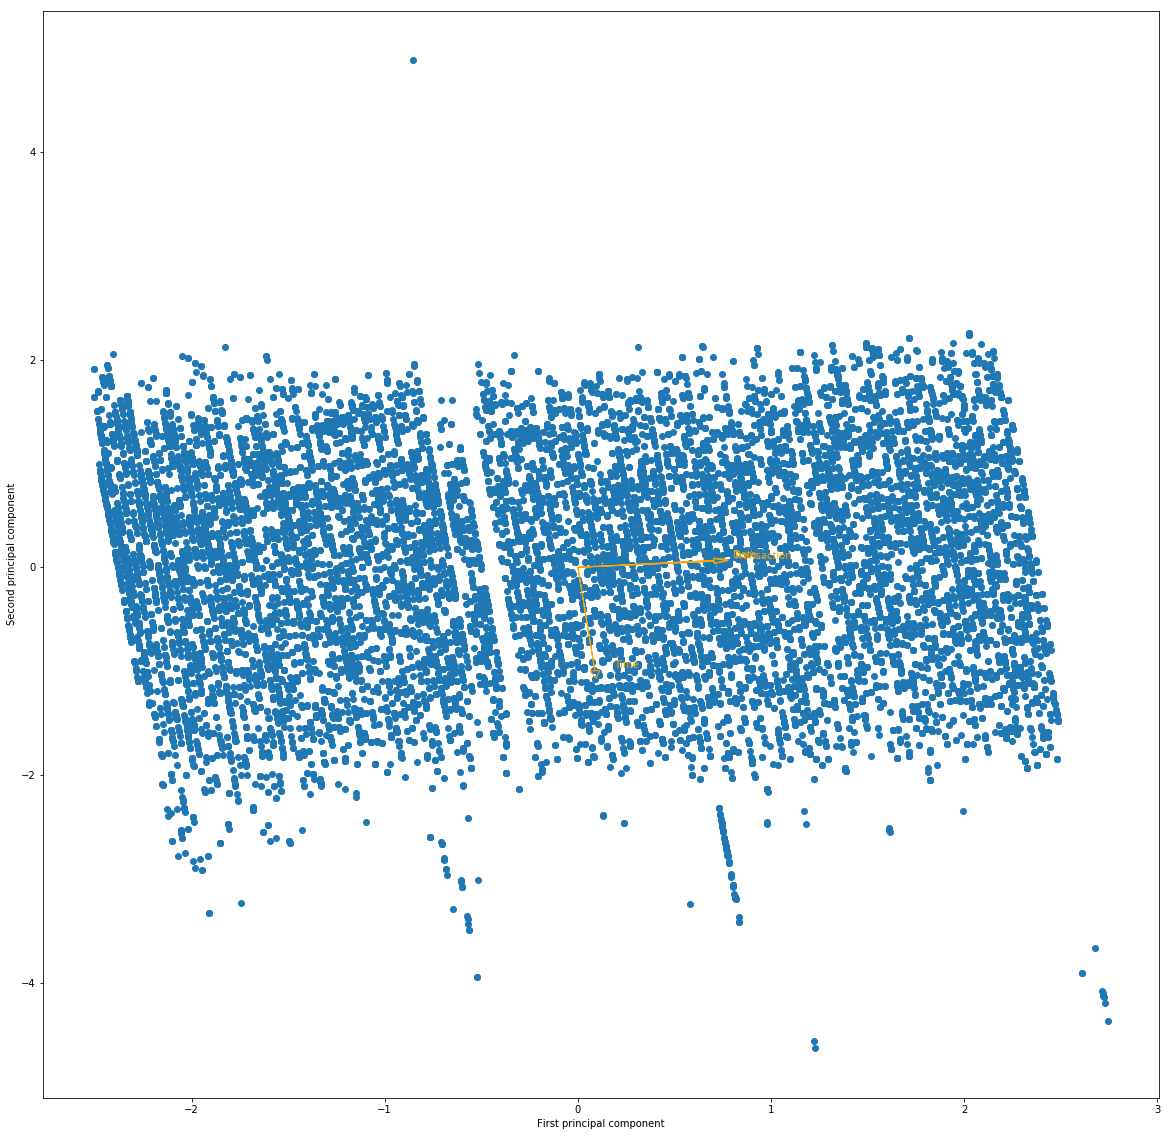

In [75]:
# Plot proyected data
plt.figure(figsize=(20,20))
plt.scatter(x_r[:,0],x_r[:,1])
plt.xlabel('First principal component')
plt.ylabel('Second principal component')

# # Plot text labels
# names_head='Item'
# names=data[names_head].ravel()
# for i in range(x_r.shape[0]):
#     plt.text(x_r[i,0],x_r[i,1],names[i]) 

# Plot load vectors
for i in range(loads.shape[1]):
    
    plt.arrow(0,0,loads[0,i],loads[1,i],ec='orange',fc='none',head_width=0.05)
    plt.text(loads[0,i]+0.1,loads[1,i]+0.1,predictors[i],color='orange', verticalalignment='top', horizontalalignment='left') 

[[ 0.70419671  0.08809373  0.70451862]
 [ 0.06597495 -0.99609857  0.05860838]
 [ 0.70693303  0.00520876 -0.70726131]]


(-1.1, 1.1)

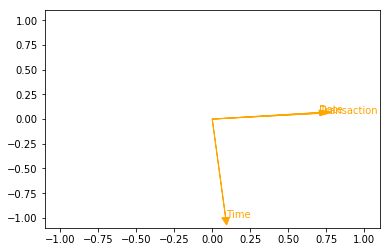

In [76]:
print(loads)
# Plot load vectors
for i in range(loads.shape[1]):
    #plt.plot([0,loads[0,i]],[0,loads[1,i]],label=predictors[i])
    plt.arrow(0,0,loads[0,i],loads[1,i],linewidth=1,color='orange',head_width=0.05)
    
#plt.legend()
    plt.text(loads[0,i],loads[1,i],predictors[i],color='orange') 
plt.xlim([-1.1, 1.1])
plt.ylim([-1.1, 1.1])

Lo que se observa es que al disminuir la segunda componente los datos tienden a aumentar el número de segundos, es decir, van a tener un tiempo de transacción más cercana al final del día. Adicionalmente, los datos con grandes valores en la primera componente indican que la transacción y la fecha son mayores, es decir, el número de días aumenta y la fecha de transacción es más cercana a la fecha actual.

[6.68756517e-01 3.30718950e-01 5.24533672e-04]
[0.66875652 0.99947547 1.        ]


(0, 1.1)

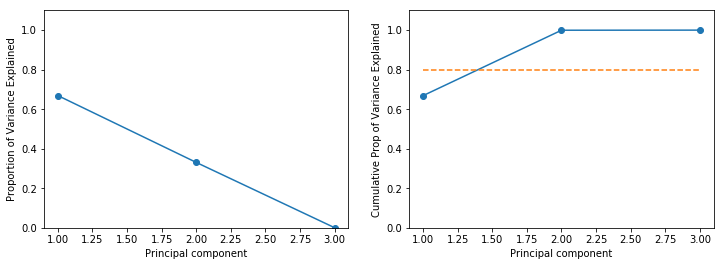

In [77]:
exp_var=pca.explained_variance_ratio_
cum_exp_var=np.cumsum(exp_var)
print(exp_var)
print(cum_exp_var)
pc=np.arange(1,len(predictors)+1)  # principal components

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(12,4))
ax = axs[0]
ax.plot(pc,exp_var,marker='o')
ax.set_xlabel('Principal component')
ax.set_ylabel('Proportion of Variance Explained')
ax.set_ylim(0,1.1)

ax = axs[1]
ax.plot(pc,cum_exp_var,marker='o')
ax.plot([min(pc),max(pc)],[0.8,0.8], '--')
ax.set_xlabel('Principal component')
ax.set_ylabel('Cumulative Prop of Variance Explained')
ax.set_ylim(0,1.1)

Como se observa, con las primeras dos componentes se explica un 99 % de la varianza, con lo que el gráfico anterior es válido para concluir los patrones establecidos

In [78]:
# Clustering. First the best number of clusters is determined

n_obs = data.shape[0]  # Number of observations

# # Set equal importance to every feature with sklearn
# mms = MinMaxScaler()
# mms.fit(data)
# scal_data = mms.transform(data[predictors])

n_clusters=np.arange(2,round(n_obs*1e-3))
sum_squared_dist=np.zeros(len(n_clusters))
print(n_clusters)
for i in range(len(n_clusters)):
    kmeans = sklearn.cluster.KMeans(n_clusters=n_clusters[i]).fit(data_modif[predictors])
    sum_squared_dist[i]=kmeans.inertia_

[ 2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20]


Text(0, 0.5, 'Sum of squared distances')

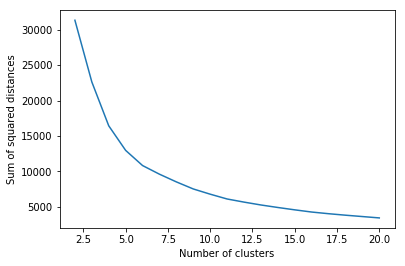

In [79]:
plt.plot(n_clusters,sum_squared_dist)
plt.xlabel('Number of clusters')
plt.ylabel('Sum of squared distances')

Text(0.5, 0, 'Date')

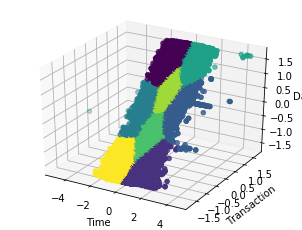

In [83]:
from mpl_toolkits.mplot3d import Axes3D
y_pred = sklearn.cluster.KMeans(n_clusters=8).fit_predict(data_modif[predictors])
fig = plt.figure(1, figsize=(4, 3))
ax = Axes3D(fig)
ax.scatter(data_modif['Time'], data_modif['Transaction'], data_modif['Date'],
               c=y_pred)
ax.set_xlabel('Time')
ax.set_ylabel('Transaction')
ax.set_zlabel('Date')